This file is used to process and read the assessment and demographic data from Silverberry's system and prepare it for analysis. 

## Section 1: Importing Libraries

In [1]:
# base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path # available in python 3.4 + 
import glob
import os
# preprocessing
from sklearn.preprocessing import StandardScaler
# dimensionality reduction
from sklearn import decomposition as skld
from sklearn import manifold as sklm
# feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, VarianceThreshold

C:\Users\mahdi.saeedi\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [8]:
# setting the path for joining multiple files
dir = r'c:\Users\mahdi.saeedi\Documents\assesment\Silverberry assessments'
csv_files = [f for f in Path(dir).glob('*.csv')] # finds all csvs in your folder.
for csv in csv_files: #iterate list
    df = pd.read_csv(csv, index_col=False) #read csv
    df = df[['Trait Name','Assessment']]
    patient_id_csv = (str(csv.name)).replace(".csv","")
    for assesment_row in df.iterrows():
        if assesment_row[1][0] =='Fat Taste Perception':
            if assesment_row[1][1] != 'NORMAL':
                print(assesment_row[1][1])
        #break
   # break
    

SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY ELEVATED
SLIGHTLY E

## Section 2: Reading demographic data

In [7]:
demog_data = pd.read_csv('demog_data.csv', index_col=False)
demog_data = demog_data[['id','gender','ancestry','bmi','diabetes','hypertension']]

In [11]:
# setting the path for joining multiple files
dir = r'c:\Users\mahdi.saeedi\Documents\assesment\Silverberry assessments'
csv_files = [f for f in Path(dir).glob('*.csv')] # finds all csvs in your folder.
patientIDs = []
noDataPatients = []
for csv in csv_files: #iterate list
    patient_id_csv = (str(csv.name)).replace(".csv","")
    patientIDs.append(patient_id_csv)
for assesment_row in demog_data.iterrows():
    if assesment_row[1][0] not in patientIDs:
        noDataPatients.append(assesment_row[1][0])
print(patientIDs)
print('\n')
print(noDataPatients)

['GSM2397052', 'GSM2397053', 'GSM2397054', 'GSM2397055', 'GSM2397056', 'GSM2397057', 'GSM2397058', 'GSM2397059', 'GSM2397060', 'GSM2397061', 'GSM2397062', 'GSM2397063', 'GSM2397064', 'GSM2397065', 'GSM2397066', 'GSM2397067', 'GSM2397069', 'GSM2397070', 'GSM2397071', 'GSM2397072', 'GSM2397073', 'GSM2397074', 'GSM2397075', 'GSM2397076', 'GSM2397077', 'GSM2397079', 'GSM2397081', 'GSM2397082', 'GSM2397083', 'GSM2397084', 'GSM2397085', 'GSM2397086', 'GSM2397087', 'GSM2397088', 'GSM2397089', 'GSM2397090', 'GSM2397091', 'GSM2397092', 'GSM2397093', 'GSM2397096', 'GSM2397097', 'GSM2397098', 'GSM2397101', 'GSM2397102', 'GSM2397103', 'GSM2397104', 'GSM2397105', 'GSM2397106', 'GSM2397109', 'GSM2397110', 'GSM2397111', 'GSM2397112', 'GSM2397113', 'GSM2397114', 'GSM2397115', 'GSM2397116', 'GSM2397117', 'GSM2397118', 'GSM2397119', 'GSM2397120', 'GSM2397121', 'GSM2397122', 'GSM2397123', 'GSM2397124', 'GSM2397125', 'GSM2397126', 'GSM2397127', 'GSM2397128', 'GSM2397129', 'GSM2397130', 'GSM2397131', 'GSM2

## creating a master dataframe to store results 

In [68]:
final_df=pd.DataFrame(columns=['trait name', 'assesment', 'gender', 'ancestry', 'bmi', 'diabetes', 'hypertention'])
final_df

,trait name,assesment,gender,ancestry,bmi,diabetes,hypertention


## Reading Assesment files

In [70]:
# setting the path for joining multiple files
dir = r'c:\Users\mahdi.saeedi\Documents\assesment\Silverberry assessments'
csv_files = [f for f in Path(dir).glob('*.csv')] # finds all csvs in your folder.
for csv in csv_files: #iterate list
    df = pd.read_csv(csv, index_col=False) #read csv
    df = df[['Trait Name','Assessment']]
    patient_id_csv = (str(csv.name)).replace(".csv","")
    # go through every row of demog data
    for row in demog_data.iterrows():
        # 0 - id, 1 - gender, 2 - ancestry, 3 - bmi, 4 - diabetes, 5 - hypertension
        patient_id = row[1][0] 
        # if patient id is a match in demog data
        if patient_id == patient_id_csv: 
            # get category info for each assessment
            for assesment_row in df.iterrows():             
                # gender, ancestry, bmi, diabetes, hypertension
                # add patient id
                # get bmi (under, healthy, overweight, obesity)
                if row[1][3] < 18.5:
                    bmi = 0#'under'
                if row[1][3] >= 18.5 and row[1][3] < 25:
                    bmi = 1#'healthy'
                if row[1][3] >= 25 and row[1][3] < 30:
                    bmi = 2#'overweight' 
                if row[1][3] >= 30:
                    bmi = 3#'obesity' 
                # gender
                if row[1][1] == 'F':
                    gender = 1#female
                if row[1][1] == 'M':
                    gender = 0#male
                
                #ancestry
                if row[1][2] == ' AA':
                    anc = 0
                if row[1][2] == ' CAU':
                    anc = 1

                if row[1][4] == ' Y':
                    diab = 1
                if row[1][4] == ' N':
                    diab = 0
                    
                if row[1][5] == ' Y':
                    hyper = 1
                if row[1][5] == ' N':
                    hyper = 0
                info = [gender, anc, bmi, diab, hyper]
                # 0 - trait name, 1 - assessment
                info.insert(0, assesment_row[1][1])
                info.insert(0, assesment_row[1][0])
                # append list to master df
                final_df.loc[len(final_df.index)] = info
                # empty array for next cycle
                info = []              
final_df

,trait name,assesment,gender,ancestry,bmi,diabetes,hypertention
0,Achilles Tendinopathy,NORMAL,1,1,3,1,1
1,Aerobic performance,TYPICAL,1,1,3,1,1
2,Anterior Cruciate Ligament Rupture,NORMAL,1,1,3,1,1
3,Caffeine Metabolism Impairment,NORMAL,1,1,3,1,1
4,Calcium Deficiency,NORMAL,1,1,3,1,1
...,...,...,...,...,...,...,...
8531,Vitamin D Deficiency,NORMAL,1,1,2,0,1
8532,Vitamin E Deficiency,NORMAL,1,1,2,0,1
8533,Vitamin K Deficiency,NORMAL,1,1,2,0,1
8534,Youthfulness,TYPICAL,1,1,2,0,1


## save master df as csv

In [71]:
final_df.to_csv('final_df2.csv')

## test for trait name count

In [5]:
final_df['trait name'].value_counts()

Joint Flexibility           97
Muscle Cramping             97
Fat Overconsumption         97
Vitamin B9 Deficiency       97
Endurance                   97
                            ..
Facial Pigmented Spots      97
Risk from Saturated Fats    97
Achilles Tendinopathy       97
Seasonality                 97
Vitamin B2 Deficiency       97
Name: trait name, Length: 88, dtype: int64

In [6]:
final_df['trait name'].unique()

array(['Achilles Tendinopathy', 'Aerobic performance',
       'Anterior Cruciate Ligament Rupture',
       'Caffeine Metabolism Impairment', 'Calcium Deficiency',
       'Carb Overconsumption', 'Choline Deficiency',
       'Coenzyme Q10 Deficiency', 'Collagen Breakdown',
       'Copper Deficiency', 'Difficulty in Losing Weight', 'Dryness',
       'Elite Endurance Athletes', 'Endurance', 'Exercise Aversion',
       'Exercise Benefits for Blood Pressure',
       'Exercise Benefits for Lowering Cholesterol',
       'Exercise Benefits for Maximal Oxygen Uptake Response',
       'Facial Pigmented Spots', 'Fat Overconsumption',
       'Fat Taste Perception', 'General Food Sensitivities',
       'Gluten Sensitivity', 'Heartbeat Reduction Difficulty',
       'Iron Deficiency', 'Iron Overload', 'Joint Flexibility',
       'Joint Injury Risk', 'Lactose Intolerance',
       'Lean Body Mass Potential', 'Low Protein Intake Risk',
       'Low Resting Metabolic Rate', 'Low-carb Diet Effectiveness',
 

In [7]:
final_df['assesment'].unique()

array(['NORMAL', 'TYPICAL', 'ELEVATED', 'SLIGHTLY ELEVATED', 'ADVANTAGED',
       'SLIGHTLY ADVANTAGED'], dtype=object)

## data analysis
#### Simply add the trait name in the name, and assessment in the associated sections of the dictionary below and run the sections to get analysis result

In [125]:
# please fill out name of the assessment & the category from the lists above
assessment_analysis = {
    'name': 'Vitamin B3 Deficiency',
    'assessment': 'SLIGHTLY ELEVATED',
    'm': 0,
    'f': 0,
    'AA': 0,
    'CAU': 0,
    'yd': 0,
    'nd': 0,
    'yh': 0,
    'nh': 0,
    'under_weight': 0,
    'healthy_weight': 0,
    'overweight': 0,
    'obesity': 0
}

In [126]:
t_name = assessment_analysis['name']
t_name = t_name.replace("\'\'","",2)
print(t_name)
t_assessment = assessment_analysis['assessment']
t_assessment = t_assessment.replace("\'\'","",2)
print(t_assessment)

Vitamin B3 Deficiency
SLIGHTLY ELEVATED


In [127]:
for row in final_df.iterrows():
    row_trait_name = row[1][0]
    row_trait_assess = row[1][1]
    if row_trait_name == t_name:
        if row_trait_assess == t_assessment:
            # count gender
            gender = row[1][2]
            gender = gender.replace("\'\'","",2)
            if gender == 'F':
                assessment_analysis['f'] = assessment_analysis['f'] + 1
            if gender == 'M':
                assessment_analysis['m'] = assessment_analysis['m'] + 1
            # count ancestry
            ancestry = row[1][3]
            ancestry = ancestry.replace("\'\' ","",2)
            if ancestry == ' CAU':
                assessment_analysis['CAU'] = assessment_analysis['CAU'] + 1
            if ancestry == ' AA':
                assessment_analysis['AA'] = assessment_analysis['AA'] + 1
            # count bmi (under, healthy, overweight, obesity)
            if row[1][4] < 18.5:
                assessment_analysis['under_weight'] = assessment_analysis['under_weight'] + 1   
            if row[1][4] >= 18.5 and row[1][4] < 25:
                assessment_analysis['healthy_weight'] = assessment_analysis['healthy_weight'] + 1 
            if row[1][4] >= 25 and row[1][4] < 30:
                assessment_analysis['overweight'] = assessment_analysis['overweight'] + 1 
            if row[1][4] >= 30:
                assessment_analysis['obesity'] = assessment_analysis['obesity'] + 1
            # count diabetes
            if row[1][5] == ' Y':
                assessment_analysis['yd'] = assessment_analysis['yd'] + 1
            if row[1][5] == ' N':
                assessment_analysis['nd'] = assessment_analysis['nd'] + 1
            # count hypertension
            if row[1][6] == ' Y':
                assessment_analysis['yh'] = assessment_analysis['yh'] + 1
            if row[1][6] == ' N':
                assessment_analysis['nh'] = assessment_analysis['nh'] + 1
    

In [128]:
assessment_analysis

{'name': 'Vitamin B3 Deficiency',
 'assessment': 'SLIGHTLY ELEVATED',
 'm': 49,
 'f': 48,
 'AA': 23,
 'CAU': 74,
 'yd': 35,
 'nd': 62,
 'yh': 84,
 'nh': 13,
 'under_weight': 1,
 'healthy_weight': 20,
 'overweight': 35,
 'obesity': 41}

In [139]:
title = str(t_name) + ' with ' + str(t_assessment) + ' assessment'

In [130]:
assessment_analysis.pop('name', None)
assessment_analysis.pop('assessment', None)

'SLIGHTLY ELEVATED'

Text(0.5, 1.0, 'Vitamin B3 Deficiency With SLIGHTLY ELEVATED assessment')

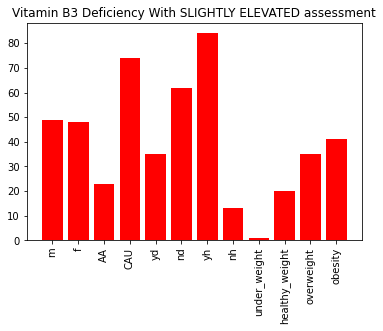

In [140]:
plt.bar(assessment_analysis.keys(), assessment_analysis.values(),  color='r')
plt.xticks(rotation=90)
plt.title(title)

## Section 3: Data Analysis New format

In [2]:
data = pd.read_csv('final_df.csv')
# drop first uname col
#data = data.iloc[: , 1:]
data

,trait name,assesment,gender,ancestry,bmi,diabetes,hypertention
0,Achilles Tendinopathy,NORMAL,F,CAU,35.9109,Y,Y
1,Achilles Tendinopathy,NORMAL,F,CAU,35.9109,Y,Y
2,Achilles Tendinopathy,NORMAL,F,CAU,35.9109,Y,Y
3,Achilles Tendinopathy,NORMAL,F,CAU,35.9109,Y,Y
4,Achilles Tendinopathy,NORMAL,F,CAU,35.9109,Y,Y
...,...,...,...,...,...,...,...
8531,Zinc Deficiency,NORMAL,F,CAU,25.0333,N,Y
8532,Zinc Deficiency,NORMAL,F,CAU,25.0333,N,Y
8533,Zinc Deficiency,NORMAL,F,CAU,25.0333,N,Y
8534,Zinc Deficiency,NORMAL,F,CAU,25.0333,N,Y


In [52]:

for i, row in data.iterrows():
    print(i)
    print(row[4])
    # get bmi (under, healthy, overweight, obesity)
    if row[4] < 18.5:
data.at[i,'under']
    if row[4] >= 18.5 and row[4] < 25:
['healthy'] 
    if row[4] >= 25 and row[4] < 30:
['overweight'] 
    if row[4] >= 30:
['obesity'] 


    break

0
35.9109


In [46]:
data['assesment'].unique()

array(['NORMAL', 'TYPICAL', 'SLIGHTLY ELEVATED', 'ELEVATED', 'ADVANTAGED',
       'SLIGHTLY ADVANTAGED'], dtype=object)

#### Create Codings for each column categories 

In [ ]:
assessment_coding = {'NORMAL': 0, 'TYPICAL': 1, 'SLIGHTLY ELEVATED': 2, 'ELEVATED': 3, 'ADVANTAGED': 4,
       'SLIGHTLY ADVANTAGED': 4}
gender_coding = {'M': 0, 'F': 1}
ancestry_coding = {'AA': 0, 'CAU': 1}


### Data Description

In [3]:
data.describe(include='all')

,trait name,assesment,gender,ancestry,bmi,diabetes,hypertention
count,8536,8536,8536,8536,8536.000000,8536,8536
unique,88,6,2,2,NaN,2,2
top,Sagging Eyelids Risk,NORMAL,M,CAU,NaN,N,Y
freq,97,4714,4312,6512,NaN,5456,7392
mean,NaN,NaN,NaN,NaN,29.635567,NaN,NaN
std,NaN,NaN,NaN,NaN,6.900782,NaN,NaN
min,NaN,NaN,NaN,NaN,8.042800,NaN,NaN
25%,NaN,NaN,NaN,NaN,25.219100,NaN,NaN
50%,NaN,NaN,NaN,NaN,28.930700,NaN,NaN
75%,NaN,NaN,NaN,NaN,32.183400,NaN,NaN


In [4]:
data.groupby(["gender","ancestry"]).mean()

bmi
gender ancestry           
F       AA       34.938219
        CAU      28.076916
M       AA       29.250843
        CAU      28.867174

In [5]:
data.groupby(["assesment","trait name"]).mean()

bmi
assesment  trait name                                                   
ADVANTAGED Exercise Benefits for Maximal Oxygen Uptake Res...  31.148072
ELEVATED   Choline Deficiency                                  26.974038
           Dryness                                             31.390988
           Overweight Potential                                24.629844
           Snacking                                            43.105665
...                                                                  ...
TYPICAL    Muscle Response to Resistance Training              34.224276
           Muscular Strength                                   28.425720
           Overall Fitness Benefits                            35.583139
           Reading Aptitude                                    43.272690
           Youthfulness                                        30.046540

[89 rows x 1 columns]

In [6]:
data["assesment"].unique()

array(['NORMAL', 'TYPICAL', 'SLIGHTLY ELEVATED', 'ELEVATED', 'ADVANTAGED',
       'SLIGHTLY ADVANTAGED'], dtype=object)

In [7]:
data["trait name"].unique()

array(['Achilles Tendinopathy', 'Aerobic performance',
       'Anterior Cruciate Ligament Rupture',
       'Caffeine Metabolism Impairment', 'Calcium Deficiency',
       'Carb Overconsumption', 'Choline Deficiency',
       'Coenzyme Q10 Deficiency', 'Collagen Breakdown',
       'Copper Deficiency', 'Difficulty in Losing Weight', 'Dryness',
       'Elite Endurance Athletes', 'Endurance', 'Exercise Aversion',
       'Exercise Benefits for Blood Pressure',
       'Exercise Benefits for Lowering Cholesterol',
       'Exercise Benefits for Maximal Oxygen Uptake Response',
       'Facial Pigmented Spots', 'Fat Overconsumption',
       'Fat Taste Perception', 'General Food Sensitivities',
       'Gluten Sensitivity', 'Heartbeat Reduction Difficulty',
       'Iron Deficiency', 'Iron Overload', 'Joint Flexibility',
       'Joint Injury Risk', 'Lactose Intolerance',
       'Lean Body Mass Potential', 'Low Protein Intake Risk',
       'Low Resting Metabolic Rate', 'Low-carb Diet Effectiveness',
 

In [8]:
data["gender"].unique()

array(['F', 'M'], dtype=object)

In [9]:
data["ancestry"].unique()

array([' CAU', ' AA'], dtype=object)

In [10]:
results_by_trait = dict.fromkeys(['Achilles Tendinopathy', 'Aerobic performance',
       'Anterior Cruciate Ligament Rupture',
       'Caffeine Metabolism Impairment', 'Calcium Deficiency',
       'Carb Overconsumption', 'Choline Deficiency',
       'Coenzyme Q10 Deficiency', 'Collagen Breakdown',
       'Copper Deficiency', 'Difficulty in Losing Weight', 'Dryness',
       'Elite Endurance Athletes', 'Endurance', 'Exercise Aversion',
       'Exercise Benefits for Blood Pressure',
       'Exercise Benefits for Lowering Cholesterol',
       'Exercise Benefits for Maximal Oxygen Uptake Response',
       'Facial Pigmented Spots', 'Fat Overconsumption',
       'Fat Taste Perception', 'General Food Sensitivities',
       'Gluten Sensitivity', 'Heartbeat Reduction Difficulty',
       'Iron Deficiency', 'Iron Overload', 'Joint Flexibility',
       'Joint Injury Risk', 'Lactose Intolerance',
       'Lean Body Mass Potential', 'Low Protein Intake Risk',
       'Low Resting Metabolic Rate', 'Low-carb Diet Effectiveness',
       'Low-fat Diet Effectiveness',
       'Lower Exercise Benefits for Heart Pump Function',
       'Lutein and Zeaxanthin Deficiency', 'Lycopene Deficiency',
       'Magnesium Deficiency', 'Mediterranean Diet Effectiveness',
       'Memory Performance', 'Misophonia',
       'Monounsaturated Fats Increased Benefits', 'Motion Sickness',
       'Muscle Cramping', 'Muscle Damage Risk',
       'Muscle Response to Resistance Training', 'Muscle Soreness',
       'Muscle Strength Loss', 'Muscular Strength',
       'Noise-induced hearing loss', 'Overall Fitness Benefits',
       'Overall Tendon and Ligament Injury Risk', 'Overweight Potential',
       'Phosphorus Deficiency', 'Photoaging',
       'Polyunsaturated Fats Increased Benefits', 'Power',
       'Reading Aptitude', 'Resistance to Stomach Flu',
       'Risk from Saturated Fats', 'Sagging Eyelids Risk',
       'Satiety Impairment', 'Seasonality', 'Selenium Deficiency',
       'Sensitivity to Salt', 'Skeletal Muscle Performance',
       'Slow Muscle Repair', 'Snacking', 'Starch Metabolism',
       'Stress Fracture', 'Sweet Snack Preference', 'Sweet Tooth',
       'Trans Fats Sensitivity', 'Vitamin A (Carotene) Deficiency',
       'Vitamin A (Retinol) Deficiency', 'Vitamin B12 Deficiency',
       'Vitamin B2 Deficiency', 'Vitamin B3 Deficiency',
       'Vitamin B5 Deficiency', 'Vitamin B6 Deficiency',
       'Vitamin B7 Deficiency', 'Vitamin B9 Deficiency',
       'Vitamin C Deficiency', 'Vitamin D Deficiency',
       'Vitamin E Deficiency', 'Vitamin K Deficiency', 'Youthfulness',
       'Zinc Deficiency'],)
results_by_trait

{'Achilles Tendinopathy': None,
 'Aerobic performance': None,
 'Anterior Cruciate Ligament Rupture': None,
 'Caffeine Metabolism Impairment': None,
 'Calcium Deficiency': None,
 'Carb Overconsumption': None,
 'Choline Deficiency': None,
 'Coenzyme Q10 Deficiency': None,
 'Collagen Breakdown': None,
 'Copper Deficiency': None,
 'Difficulty in Losing Weight': None,
 'Dryness': None,
 'Elite Endurance Athletes': None,
 'Endurance': None,
 'Exercise Aversion': None,
 'Exercise Benefits for Blood Pressure': None,
 'Exercise Benefits for Lowering Cholesterol': None,
 'Exercise Benefits for Maximal Oxygen Uptake Response': None,
 'Facial Pigmented Spots': None,
 'Fat Overconsumption': None,
 'Fat Taste Perception': None,
 'General Food Sensitivities': None,
 'Gluten Sensitivity': None,
 'Heartbeat Reduction Difficulty': None,
 'Iron Deficiency': None,
 'Iron Overload': None,
 'Joint Flexibility': None,
 'Joint Injury Risk': None,
 'Lactose Intolerance': None,
 'Lean Body Mass Potential': None

In [11]:
# create dictionary for assesment association
results_by_assessment = dict.fromkeys(['NORMAL', 'TYPICAL', 'ELEVATED', 'SLIGHTLY ELEVATED', 'ADVANTAGED',
       'SLIGHTLY ADVANTAGED'],)
results_by_assessment

{'NORMAL': None,
 'TYPICAL': None,
 'ELEVATED': None,
 'SLIGHTLY ELEVATED': None,
 'ADVANTAGED': None,
 'SLIGHTLY ADVANTAGED': None}

In [12]:
for key in results_by_assessment:
    results_by_assessment[key] = dict.fromkeys(['F-AA', 'F-CAU', 'M-AA', 'M-CAU'],)
results_by_assessment
#['under', 'healthy', 'overweight', 'obesity']
#, 'DY', 'DN', 'HY', 'HN', 'BMI'

{'NORMAL': {'F-AA': None, 'F-CAU': None, 'M-AA': None, 'M-CAU': None},
 'TYPICAL': {'F-AA': None, 'F-CAU': None, 'M-AA': None, 'M-CAU': None},
 'ELEVATED': {'F-AA': None, 'F-CAU': None, 'M-AA': None, 'M-CAU': None},
 'SLIGHTLY ELEVATED': {'F-AA': None,
  'F-CAU': None,
  'M-AA': None,
  'M-CAU': None},
 'ADVANTAGED': {'F-AA': None, 'F-CAU': None, 'M-AA': None, 'M-CAU': None},
 'SLIGHTLY ADVANTAGED': {'F-AA': None,
  'F-CAU': None,
  'M-AA': None,
  'M-CAU': None}}

In [13]:
# count bmi (under, healthy, overweight, obesity)
for key in results_by_assessment:
    for second_key in results_by_assessment[key]:
        results_by_assessment[key][second_key] = dict.fromkeys(['DY', 'DN', 'HY', 'HN', 'under', 'healthy', 'overweight', 'obesity'],0)

            
results_by_assessment

{'NORMAL': {'F-AA': {'DY': 0,
   'DN': 0,
   'HY': 0,
   'HN': 0,
   'under': 0,
   'healthy': 0,
   'overweight': 0,
   'obesity': 0},
  'F-CAU': {'DY': 0,
   'DN': 0,
   'HY': 0,
   'HN': 0,
   'under': 0,
   'healthy': 0,
   'overweight': 0,
   'obesity': 0},
  'M-AA': {'DY': 0,
   'DN': 0,
   'HY': 0,
   'HN': 0,
   'under': 0,
   'healthy': 0,
   'overweight': 0,
   'obesity': 0},
  'M-CAU': {'DY': 0,
   'DN': 0,
   'HY': 0,
   'HN': 0,
   'under': 0,
   'healthy': 0,
   'overweight': 0,
   'obesity': 0}},
 'TYPICAL': {'F-AA': {'DY': 0,
   'DN': 0,
   'HY': 0,
   'HN': 0,
   'under': 0,
   'healthy': 0,
   'overweight': 0,
   'obesity': 0},
  'F-CAU': {'DY': 0,
   'DN': 0,
   'HY': 0,
   'HN': 0,
   'under': 0,
   'healthy': 0,
   'overweight': 0,
   'obesity': 0},
  'M-AA': {'DY': 0,
   'DN': 0,
   'HY': 0,
   'HN': 0,
   'under': 0,
   'healthy': 0,
   'overweight': 0,
   'obesity': 0},
  'M-CAU': {'DY': 0,
   'DN': 0,
   'HY': 0,
   'HN': 0,
   'under': 0,
   'healthy': 0,
   '

In [14]:
for key in results_by_trait:
    results_by_trait[key] = results_by_assessment
results_by_trait

{'Achilles Tendinopathy': {'NORMAL': {'F-AA': {'DY': 0,
    'DN': 0,
    'HY': 0,
    'HN': 0,
    'under': 0,
    'healthy': 0,
    'overweight': 0,
    'obesity': 0},
   'F-CAU': {'DY': 0,
    'DN': 0,
    'HY': 0,
    'HN': 0,
    'under': 0,
    'healthy': 0,
    'overweight': 0,
    'obesity': 0},
   'M-AA': {'DY': 0,
    'DN': 0,
    'HY': 0,
    'HN': 0,
    'under': 0,
    'healthy': 0,
    'overweight': 0,
    'obesity': 0},
   'M-CAU': {'DY': 0,
    'DN': 0,
    'HY': 0,
    'HN': 0,
    'under': 0,
    'healthy': 0,
    'overweight': 0,
    'obesity': 0}},
  'TYPICAL': {'F-AA': {'DY': 0,
    'DN': 0,
    'HY': 0,
    'HN': 0,
    'under': 0,
    'healthy': 0,
    'overweight': 0,
    'obesity': 0},
   'F-CAU': {'DY': 0,
    'DN': 0,
    'HY': 0,
    'HN': 0,
    'under': 0,
    'healthy': 0,
    'overweight': 0,
    'obesity': 0},
   'M-AA': {'DY': 0,
    'DN': 0,
    'HY': 0,
    'HN': 0,
    'under': 0,
    'healthy': 0,
    'overweight': 0,
    'obesity': 0},
   'M-CAU': 

In [15]:
traits = ['Achilles Tendinopathy', 'Aerobic performance',
       'Anterior Cruciate Ligament Rupture',
       'Caffeine Metabolism Impairment', 'Calcium Deficiency',
       'Carb Overconsumption', 'Choline Deficiency',
       'Coenzyme Q10 Deficiency', 'Collagen Breakdown',
       'Copper Deficiency', 'Difficulty in Losing Weight', 'Dryness',
       'Elite Endurance Athletes', 'Endurance', 'Exercise Aversion',
       'Exercise Benefits for Blood Pressure',
       'Exercise Benefits for Lowering Cholesterol',
       'Exercise Benefits for Maximal Oxygen Uptake Response',
       'Facial Pigmented Spots', 'Fat Overconsumption',
       'Fat Taste Perception', 'General Food Sensitivities',
       'Gluten Sensitivity', 'Heartbeat Reduction Difficulty',
       'Iron Deficiency', 'Iron Overload', 'Joint Flexibility',
       'Joint Injury Risk', 'Lactose Intolerance',
       'Lean Body Mass Potential', 'Low Protein Intake Risk',
       'Low Resting Metabolic Rate', 'Low-carb Diet Effectiveness',
       'Low-fat Diet Effectiveness',
       'Lower Exercise Benefits for Heart Pump Function',
       'Lutein and Zeaxanthin Deficiency', 'Lycopene Deficiency',
       'Magnesium Deficiency', 'Mediterranean Diet Effectiveness',
       'Memory Performance', 'Misophonia',
       'Monounsaturated Fats Increased Benefits', 'Motion Sickness',
       'Muscle Cramping', 'Muscle Damage Risk',
       'Muscle Response to Resistance Training', 'Muscle Soreness',
       'Muscle Strength Loss', 'Muscular Strength',
       'Noise-induced hearing loss', 'Overall Fitness Benefits',
       'Overall Tendon and Ligament Injury Risk', 'Overweight Potential',
       'Phosphorus Deficiency', 'Photoaging',
       'Polyunsaturated Fats Increased Benefits', 'Power',
       'Reading Aptitude', 'Resistance to Stomach Flu',
       'Risk from Saturated Fats', 'Sagging Eyelids Risk',
       'Satiety Impairment', 'Seasonality', 'Selenium Deficiency',
       'Sensitivity to Salt', 'Skeletal Muscle Performance',
       'Slow Muscle Repair', 'Snacking', 'Starch Metabolism',
       'Stress Fracture', 'Sweet Snack Preference', 'Sweet Tooth',
       'Trans Fats Sensitivity', 'Vitamin A (Carotene) Deficiency',
       'Vitamin A (Retinol) Deficiency', 'Vitamin B12 Deficiency',
       'Vitamin B2 Deficiency', 'Vitamin B3 Deficiency',
       'Vitamin B5 Deficiency', 'Vitamin B6 Deficiency',
       'Vitamin B7 Deficiency', 'Vitamin B9 Deficiency',
       'Vitamin C Deficiency', 'Vitamin D Deficiency',
       'Vitamin E Deficiency', 'Vitamin K Deficiency', 'Youthfulness',
       'Zinc Deficiency']

In [16]:
#dictionaries
#results_by_trait
#results_by_assessment

# {'NORMAL': None,
#  'TYPICAL': None,
#  'ELEVATED': None,
#  'SLIGHTLY ELEVATED': None,
#  'ADVANTAGED': None,
#  'SLIGHTLY ADVANTAGED': None}

for trait in traits:
    #print(trait)
    for row in data.iterrows():
        #get results from csv file row
        trait_name_row = row[1][0]
        #match row trait name with list
        if trait_name_row == trait:
            
            assessment = row[1][1]
            gender = row[1][2]
            acestry = row[1][3]
            bmi = row[1][4]
            diabetes = row[1][5]
            hypertention = row[1][6]
            #print(hypertention)
            # get dict for category numbers
            #category_dict = results_by_assessment[assessment]
            #print(category_dict)
            #print(diabetes)
            
            
            
            #get F-AA
            if gender == 'F':
                if acestry == ' CAU':
                    # get diabetes
                    if diabetes == ' Y':
                        results_by_trait[trait][assessment]['F-CAU']['DY'] = results_by_trait[trait][assessment]['F-CAU']['DY'] + 1
                    if diabetes == ' N':
                        results_by_trait[trait][assessment]['F-CAU']['DN'] = results_by_trait[trait][assessment]['F-CAU']['DN'] + 1
                    # get hypertention
                    if hypertention == ' Y':
                        results_by_trait[trait][assessment]['F-CAU']['HY'] = results_by_trait[trait][assessment]['F-CAU']['HY'] + 1
                    if hypertention == ' N':
                        results_by_trait[trait][assessment]['F-CAU']['HN'] = results_by_trait[trait][assessment]['F-CAU']['HN'] + 1
                
                    # get bmi (under, healthy, overweight, obesity)
                    if bmi < 18.5:
                        results_by_trait[trait][assessment]['F-CAU']['under'] = results_by_trait[trait][assessment]['F-CAU']['under'] + 1   
                    if bmi >= 18.5 and bmi < 25:
                        results_by_trait[trait][assessment]['F-CAU']['healthy'] = results_by_trait[trait][assessment]['F-CAU']['healthy'] + 1 
                    if bmi >= 25 and bmi < 30:
                        results_by_trait[trait][assessment]['F-CAU']['overweight'] = results_by_trait[trait][assessment]['F-CAU']['overweight'] + 1 
                    if bmi >= 30:
                        results_by_trait[trait][assessment]['F-CAU']['obesity'] = results_by_trait[trait][assessment]['F-CAU']['obesity'] + 1

                if acestry == ' AA':
                    # get diabetes
                    if diabetes == ' Y':
                        results_by_trait[trait][assessment]['F-AA']['DY'] = results_by_trait[trait][assessment]['F-AA']['DY'] + 1
                    if diabetes == ' N':
                        results_by_trait[trait][assessment]['F-AA']['DN'] = results_by_trait[trait][assessment]['F-AA']['DN'] + 1
                    # get hypertention
                    if hypertention == ' Y':
                        results_by_trait[trait][assessment]['F-AA']['HY'] = results_by_trait[trait][assessment]['F-AA']['HY'] + 1
                    if hypertention == ' N':
                        results_by_trait[trait][assessment]['F-AA']['HN'] = results_by_trait[trait][assessment]['F-AA']['HN'] + 1
                
                    # get bmi (under, healthy, overweight, obesity)
                    if bmi < 18.5:
                        results_by_trait[trait][assessment]['F-AA']['under'] = results_by_trait[trait][assessment]['F-AA']['under'] + 1   
                    if bmi >= 18.5 and bmi < 25:
                        results_by_trait[trait][assessment]['F-AA']['healthy'] = results_by_trait[trait][assessment]['F-AA']['healthy'] + 1 
                    if bmi >= 25 and bmi < 30:
                        results_by_trait[trait][assessment]['F-AA']['overweight'] = results_by_trait[trait][assessment]['F-AA']['overweight'] + 1 
                    if bmi >= 30:
                        results_by_trait[trait][assessment]['F-AA']['obesity'] = results_by_trait[trait][assessment]['F-AA']['obesity'] + 1

            if gender == 'M':
                if acestry == ' CAU':
                    # get diabetes
                    if diabetes == ' Y':
                        results_by_trait[trait][assessment]['M-CAU']['DY'] = results_by_trait[trait][assessment]['M-CAU']['DY'] + 1
                    if diabetes == ' N':
                        results_by_trait[trait][assessment]['M-CAU']['DN'] = results_by_trait[trait][assessment]['M-CAU']['DN'] + 1
                    # get hypertention
                    if hypertention == ' Y':
                        results_by_trait[trait][assessment]['M-CAU']['HY'] = results_by_trait[trait][assessment]['M-CAU']['HY'] + 1
                    if hypertention == ' N':
                        results_by_trait[trait][assessment]['M-CAU']['HN'] = results_by_trait[trait][assessment]['M-CAU']['HN'] + 1
                
                    # get bmi (under, healthy, overweight, obesity)
                    if bmi < 18.5:
                        results_by_trait[trait][assessment]['M-CAU']['under'] = results_by_trait[trait][assessment]['M-CAU']['under'] + 1   
                    if bmi >= 18.5 and bmi < 25:
                        results_by_trait[trait][assessment]['M-CAU']['healthy'] = results_by_trait[trait][assessment]['M-CAU']['healthy'] + 1 
                    if bmi >= 25 and bmi < 30:
                        results_by_trait[trait][assessment]['M-CAU']['overweight'] = results_by_trait[trait][assessment]['M-CAU']['overweight'] + 1 
                    if bmi >= 30:
                        results_by_trait[trait][assessment]['M-CAU']['obesity'] = results_by_trait[trait][assessment]['M-CAU']['obesity'] + 1

                if acestry == ' AA':
                    # get diabetes
                    if diabetes == ' Y':
                        results_by_trait[trait][assessment]['M-AA']['DY'] = results_by_trait[trait][assessment]['M-AA']['DY'] + 1
                    if diabetes == ' N':
                        results_by_trait[trait][assessment]['M-AA']['DN'] = results_by_trait[trait][assessment]['M-AA']['DN'] + 1
                    # get hypertention
                    if hypertention == ' Y':
                        results_by_trait[trait][assessment]['M-AA']['HY'] = results_by_trait[trait][assessment]['M-AA']['HY'] + 1
                    if hypertention == ' N':
                        results_by_trait[trait][assessment]['M-AA']['HN'] = results_by_trait[trait][assessment]['M-AA']['HN'] + 1
                
                    # get bmi (under, healthy, overweight, obesity)
                    if bmi < 18.5:
                        results_by_trait[trait][assessment]['M-AA']['under'] = results_by_trait[trait][assessment]['M-AA']['under'] + 1   
                    if bmi >= 18.5 and bmi < 25:
                        results_by_trait[trait][assessment]['M-AA']['healthy'] = results_by_trait[trait][assessment]['M-AA']['healthy'] + 1 
                    if bmi >= 25 and bmi < 30:
                        results_by_trait[trait][assessment]['M-AA']['overweight'] = results_by_trait[trait][assessment]['M-AA']['overweight'] + 1 
                    if bmi >= 30:
                        results_by_trait[trait][assessment]['M-AA']['obesity'] = results_by_trait[trait][assessment]['M-AA']['obesity'] + 1


                
                
              
                
                
                
                
                


        #print(row[1][0])
        #break
    #break

    
results_by_trait

{'Achilles Tendinopathy': {'NORMAL': {'F-AA': {'DY': 465,
    'DN': 176,
    'HY': 641,
    'HN': 0,
    'under': 0,
    'healthy': 7,
    'overweight': 150,
    'obesity': 484},
   'F-CAU': {'DY': 369,
    'DN': 1398,
    'HY': 1767,
    'HN': 0,
    'under': 88,
    'healthy': 506,
    'overweight': 670,
    'obesity': 503},
   'M-AA': {'DY': 75,
    'DN': 410,
    'HY': 309,
    'HN': 176,
    'under': 0,
    'healthy': 88,
    'overweight': 234,
    'obesity': 163},
   'M-CAU': {'DY': 664,
    'DN': 1157,
    'HY': 1439,
    'HN': 382,
    'under': 0,
    'healthy': 356,
    'overweight': 911,
    'obesity': 554}},
  'TYPICAL': {'F-AA': {'DY': 311,
    'DN': 176,
    'HY': 487,
    'HN': 0,
    'under': 0,
    'healthy': 176,
    'overweight': 10,
    'obesity': 301},
   'F-CAU': {'DY': 119,
    'DN': 125,
    'HY': 244,
    'HN': 0,
    'under': 0,
    'healthy': 9,
    'overweight': 102,
    'obesity': 133},
   'M-AA': {'DY': 78,
    'DN': 0,
    'HY': 78,
    'HN': 0,
    'under

In [25]:
import json
# Serializing json  
json_object = json.dumps(results_by_trait, indent = 4) 
#print(json_object)
f = open('assessment_data.json', 'w')
f.write(json_object)

580259

In [17]:
results = results_by_trait['Achilles Tendinopathy']
results['NORMAL']

{'F-AA': {'DY': 465,
  'DN': 176,
  'HY': 641,
  'HN': 0,
  'under': 0,
  'healthy': 7,
  'overweight': 150,
  'obesity': 484},
 'F-CAU': {'DY': 369,
  'DN': 1398,
  'HY': 1767,
  'HN': 0,
  'under': 88,
  'healthy': 506,
  'overweight': 670,
  'obesity': 503},
 'M-AA': {'DY': 75,
  'DN': 410,
  'HY': 309,
  'HN': 176,
  'under': 0,
  'healthy': 88,
  'overweight': 234,
  'obesity': 163},
 'M-CAU': {'DY': 664,
  'DN': 1157,
  'HY': 1439,
  'HN': 382,
  'under': 0,
  'healthy': 356,
  'overweight': 911,
  'obesity': 554}}

In [37]:
results_by_trait['Achilles Tendinopathy'].plot(kind='barh',stacked=True)

AttributeError: 'dict' object has no attribute 'plot'

In [43]:
# asses_results = results_by_trait['Achilles Tendinopathy']
# asses_results.pop('BMI', None)
# print(asses_results)
trait_name = 'Calcium Deficiency'
assesment_list = []
FAA = []
FCAU = []
MAA = []
MCAU = []


for key in results_by_trait[trait_name].keys():
    assesment_list.append(key)
    print(key)
    for key2 in results_by_trait[trait_name][key].keys():
        if key2 == 'F-AA':
            FAA.append(list(results_by_trait[trait_name][key][key2].values()))
        if key2 == 'F-CAU':
            FCAU.append(list(results_by_trait[trait_name][key][key2].values()))
        if key2 == 'M-AA':
            MAA.append(list(results_by_trait[trait_name][key][key2].values()))
        if key2 == 'M-CAU':
            MCAU.append(list(results_by_trait[trait_name][key][key2].values()))
print(assesment_list)
print('\n')
print(FAA)
print('\n')
print(FCAU)
print('\n')
print(MAA)
print('\n')
print(MCAU)

NORMAL
TYPICAL
ELEVATED
SLIGHTLY ELEVATED
ADVANTAGED
SLIGHTLY ADVANTAGED
['NORMAL', 'TYPICAL', 'ELEVATED', 'SLIGHTLY ELEVATED', 'ADVANTAGED', 'SLIGHTLY ADVANTAGED']


[[465, 176, 641, 0, 0, 7, 150, 484], [311, 176, 487, 0, 0, 176, 10, 301], [13, 0, 13, 0, 0, 0, 0, 13], [187, 0, 187, 0, 0, 81, 16, 90], [74, 0, 74, 0, 0, 0, 0, 74], [6, 0, 6, 0, 0, 0, 0, 6]]


[[369, 1398, 1767, 0, 88, 506, 670, 503], [119, 125, 244, 0, 0, 9, 102, 133], [56, 0, 56, 0, 0, 0, 0, 56], [127, 339, 466, 0, 0, 189, 42, 235], [0, 23, 23, 0, 0, 0, 0, 23], [121, 139, 260, 0, 0, 0, 66, 194]]


[[75, 410, 309, 176, 0, 88, 234, 163], [78, 0, 78, 0, 0, 0, 0, 78], [0, 0, 0, 0, 0, 0, 0, 0], [23, 30, 53, 0, 0, 0, 30, 23], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]]


[[664, 1157, 1439, 382, 0, 356, 911, 554], [137, 703, 389, 451, 0, 127, 522, 191], [125, 291, 396, 20, 0, 80, 175, 161], [130, 367, 413, 84, 0, 141, 33, 323], [0, 0, 0, 0, 0, 0, 0, 0], [0, 122, 91, 31, 0, 0, 119, 3]]


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
# DY, DN, HY, HN, BMI rating: Under, Healthy, Overwight, obesity
raw_data = {"segment": ["F-AA", "F-CAU", "M-AA", "M-CAU"],
            "DY": [FAA[2][0], FCAU[2][0], MAA[2][0], MCAU[2][0]],
            "DN": [FAA[2][1], FCAU[2][1], MAA[2][1], MCAU[2][1]]}
dataNew = pd.DataFrame(raw_data, columns = ["Segment", "Diabetes_Yes", "Diabetes_No"])
print(dataNew)

Empty DataFrame
Columns: [Segment, Diabetes_Yes, Diabetes_No]
Index: []


In [ ]:
FAA[2][0], FCAU[2][0], MAA[2][0], MCAU[2][0]

In [23]:
import json 
# Serializing json  
json_object = json.dumps(results_by_trait, indent = 4) 
print(json_object)

{
    "Achilles Tendinopathy": {
        "NORMAL": {
            "F": 2332,
            "M": 2382,
            "CAU": 3595,
            "AA": 1119,
            "DY": 1701,
            "DN": 3013,
            "HY": 4083,
            "HN": 631,
            "BMI": {
                "under": 49,
                "healthy": 968,
                "overweight": 1706,
                "obesity": 1991
            }
        },
        "TYPICAL": {
            "F": 816,
            "M": 833,
            "CAU": 1258,
            "AA": 391,
            "DY": 595,
            "DN": 1054,
            "HY": 1428,
            "HN": 221,
            "BMI": {
                "under": 17,
                "healthy": 340,
                "overweight": 595,
                "obesity": 697
            }
        },
        "ELEVATED": {
            "F": 240,
            "M": 245,
            "CAU": 370,
            "AA": 115,
            "DY": 175,
            "DN": 310,
            "HY": 420,
            "HN": 65

<ipython-input-21-2550cc4ba5a5>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

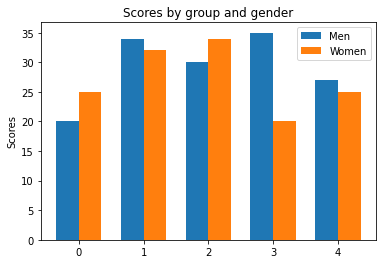

In [21]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
# def getPercentage(num):
#     return percentage = num / 8536

fig, ax = plt.subplots(figsize=(15,8))
w=0.1
#Labels = ['F-AA','F-CAU', 'M-AA', 'M-CAU']
Labels = ['DY','DN', 'HY', 'HN', 'Under', 'Healthy', 'Overweight','Obesity']
faa = FAA[2]
fcau = FCAU[2]
maa = MAA[2]
mcau = MCAU[2]
x = np.arange(len(Labels))



plt.show()
#x = ["DY","DN", "HY", "HN", "Under", "Healthy", "Overwight", "obesity"]
#x = assesment_list
# DY, DN, HY, HN, BMI rating: Under, Healthy, Overwight, obesity

rects1 = ax.bar(x - w/2, faa, w, label='F-AA')
rects2 = ax.bar(x + w/2, fcau, w, label='F-CAU')
rects3 = ax.bar(x + w/2, maa, w, label='M-AA')      
rects4 = ax.bar(x + w/2, mcau, w, label='M-CAU')
# bar_DY = np.arange(len(x)) 
# bar_DN = [i+w for i in bar_DY]
# bar_HY = [i+w for i in bar_DN]
# bar_HN = [i+w for i in bar_HY]
# bar_Under = [i+w for i in bar_HN]
# bar_Healthy = [i+w for i in bar_Under]
# bar_Overweight = [i+w for i in bar_Healthy]
# bar_Obesity = [i+w for i in bar_Overweight]

# plt.bar(bar_DY, FAA[2][0], w, label="Diabetes-Yes")
# plt.bar(bar_DN, FAA[2][1], w, label="Diabetes-No")

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.bar_label(rects3, padding=3)
# ax.bar_label(rects4, padding=3)

plt.xlabel('Achilles Tendinopathy - Elevated')
plt.ylabel('Totals')
plt.title('Trait Grouped Gender and Ancestry based on assessment')
plt.xticks(bar_DY+w/2, x, rotation=90)
plt.legend()

fig.tight_layout()
